# Data Preparation

In [2]:
import sys
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import subprocess


import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

from geopy.geocoders import Nominatim
!pip install folium
import folium

import urllib
from urllib.request import urlopen
from bs4 import BeautifulSoup

     |████████████████████████████████| 102kB 8.6MB/s ta 0:00:011


In [5]:
url = "https://en.wikipedia.org/wiki/List_of_parks_in_San_Francisco#City"
#html = urlopen(url)
req = urllib.request.Request(url, headers={'User-Agent' : "Magic Browser"}) 
html = urllib.request.urlopen( req )

In [6]:
soup = BeautifulSoup(html, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [7]:
text = soup.get_text()
print(soup.text)






List of parks in San Francisco - Wikipedia
document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"f87f1d98-651f-4276-befd-3c6549afde0f","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_parks_in_San_Francisco","wgTitle":"List of parks in San Francisco","wgCurRevisionId":957391499,"wgRevisionId":957391499,"wgArticleId":1487596,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Dynamic lists","Lists of parks in the United States","Parks in San Francisco","San Francisco-related lists","Sports venues in San Francisco"],"wgPageContentLanguage":"en","wgPageContentModel":"wik

In [8]:
soup.find_all('a')

[<a id="top"></a>,
 <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>,
 <a class="mw-jump-link" href="#p-search">Jump to search</a>,
 <a href="/wiki/San_Francisco" title="San Francisco">San Francisco</a>,
 <a href="#Federal"><span class="tocnumber">1</span> <span class="toctext">Federal</span></a>,
 <a href="#State"><span class="tocnumber">2</span> <span class="toctext">State</span></a>,
 <a href="#City"><span class="tocnumber">3</span> <span class="toctext">City</span></a>,
 <a href="#Private"><span class="tocnumber">4</span> <span class="toctext">Private</span></a>,
 <a href="#Privately-Owned_Public_Open_Spaces"><span class="tocnumber">4.1</span> <span class="toctext">Privately-Owned Public Open Spaces</span></a>,
 <a href="#See_also"><span class="tocnumber">5</span> <span class="toctext">See also</span></a>,
 <a href="#References"><span class="tocnumber">6</span> <span class="toctext">References</span></a>,
 <a href="/w/index.php?title=List_of_parks_in_San_Francisco&amp

In [9]:
list_district = []
for i in range(18, 38):
    district = soup.find_all('a')[i]
    list_district.append(district.text)

In [10]:
df = pd.DataFrame(list_district)
df.rename(columns={0 : 'Parks'}, inplace=True)
df.head()

,Parks
0,Golden Gate National Recreation Area
1,Alcatraz
2,China Beach
3,Fort Funston
4,Fort Mason


# Find the latitude and longitude of the parks

In [12]:
column_names = ['Parks', 'Latitude', 'Longitude'] 

sf_parks = pd.DataFrame(columns=column_names)
sf_parks['Parks'] = df['Parks']


In [13]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="sf_explorer")

lat = []
long = []

for address in sf_parks['Parks']:
    try:
        location = geolocator.geocode(address + ', sf', timeout = None)
        lat.append(location.latitude)
        long.append(location.longitude)
    except AttributeError:
        lat.append(0)
        long.append(0)
    
sf_parks['Latitude'] = lat
sf_parks['Longitude'] = long

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: DeprecationWarning: `timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.


In [16]:
sf_parks.head(20)

,Parks,Latitude,Longitude
0,Golden Gate National Recreation Area,37.849927,-122.517752
1,Alcatraz,37.826721,-122.422759
2,China Beach,37.788123,-122.490762
3,Fort Funston,37.719104,-122.503299
4,Fort Mason,37.806283,-122.428992
5,Fort Miley,37.782805,-122.505639
6,Lands End,37.783887,-122.506829
7,Ocean Beach,37.760314,-122.508219
8,The Presidio,37.798746,-122.464589
9,Baker Beach,37.793109,-122.483842


In [22]:
sf_parks.to_csv

<bound method NDFrame.to_csv of                                               Parks   Latitude   Longitude
0              Golden Gate National Recreation Area  37.849927 -122.517752
1                                          Alcatraz  37.826721 -122.422759
2                                       China Beach  37.788123 -122.490762
3                                      Fort Funston  37.719104 -122.503299
4                                        Fort Mason  37.806283 -122.428992
5                                        Fort Miley  37.782805 -122.505639
6                                         Lands End  37.783887 -122.506829
7                                       Ocean Beach  37.760314 -122.508219
8                                      The Presidio  37.798746 -122.464589
9                                       Baker Beach  37.793109 -122.483842
10                                     Crissy Field  37.804596 -122.466607
11                                       Fort Point  37.810743 -122.

In [30]:
sf_parks.to_html('sf_parks_table.html')
subprocess.call(
    'wkhtmltoimage -f png --width 0 sf_parks_table.html sf_parks_table.png', shell=True)

127

In [26]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="sf_explorer")
address = 'San Francisco'

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


In [32]:
url='sf_parks_table.html'
sf_data=pd.read_html(url, header=0)[0]
sf_data.head()

,Unnamed: 0,Parks,Latitude,Longitude
0,0,Golden Gate National Recreation Area,37.849927,-122.517752
1,1,Alcatraz,37.826721,-122.422759
2,2,China Beach,37.788123,-122.490762
3,3,Fort Funston,37.719104,-122.503299
4,4,Fort Mason,37.806283,-122.428992


In [83]:
map_sf = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(sf_data['Latitude'], sf_data['Longitude'], sf_data['Parks']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf.save("sf_parks_table.html")

map_sf

In [38]:
# The code was removed by Watson Studio for sharing.

In [39]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [42]:
import requests
sf_venues = getNearbyVenues(names=sf_data['Parks'],
                                   latitudes=sf_data['Latitude'],
                                   longitudes=sf_data['Longitude']
                                  )

Golden Gate National Recreation Area
Alcatraz
China Beach
Fort Funston
Fort Mason
Fort Miley
Lands End
Ocean Beach
The Presidio
Baker Beach
Crissy Field
Fort Point
San Francisco National Cemetery
Sutro District
Cliff House
Sutro Baths
Sutro Heights Park
San Francisco Maritime National Historical Park
Aquatic Park
Hyde Street Pier


In [47]:
print(sf_venues.shape)
sf_venues.head(301)

(537, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alcatraz,37.826721,-122.422759,Alcatraz Island,37.826828,-122.422822,Historic Site
1,Alcatraz,37.826721,-122.422759,Alcatraz Cell House,37.826802,-122.422963,Historic Site
2,Alcatraz,37.826721,-122.422759,Alcatraz Island Lighthouse,37.826294,-122.422226,Lighthouse
3,Alcatraz,37.826721,-122.422759,Alcatraz Industry Building,37.827517,-122.424612,Historic Site
4,Alcatraz,37.826721,-122.422759,Alcatraz D Block,37.826768,-122.422434,Historic Site
5,Alcatraz,37.826721,-122.422759,Alcatraz Shower Room,37.826781,-122.422920,Historic Site
6,Alcatraz,37.826721,-122.422759,Alcatraz Cellhouse Dining Hall,37.826840,-122.423066,Historic Site
7,Alcatraz,37.826721,-122.422759,Alcatraz Water Tower,37.827353,-122.423472,Historic Site
8,Alcatraz,37.826721,-122.422759,Alcatraz Recreation Yard,37.826766,-122.422960,Playground
9,Alcatraz,37.826721,-122.422759,Alcatraz Heliport,37.826699,-122.421146,Heliport


In [48]:
sf_venues[:5].to_html('sf_venues_table.html')
subprocess.call(
    'wkhtmltoimage -f png --width 0 sf_venues_table.html sf_venues_table.png', shell=True)

127

In [49]:
sf_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alcatraz,26,26,26,26,26,26
Aquatic Park,76,76,76,76,76,76
Baker Beach,7,7,7,7,7,7
China Beach,5,5,5,5,5,5
Cliff House,20,20,20,20,20,20
Crissy Field,18,18,18,18,18,18
Fort Funston,8,8,8,8,8,8
Fort Mason,43,43,43,43,43,43
Fort Miley,22,22,22,22,22,22


In [50]:
print('There are {} uniques categories.'.format(len(sf_venues['Venue Category'].unique())))

There are 134 uniques categories.


In [54]:
sf_pet = sf_venues[sf_venues['Venue Category'].str.contains('Pet')].reset_index(drop=True)
sf_pet.index = np.arange(1, len(sf_pet)+1)
print ("The size of the dataframe with pet only as Venue Category is: ", sf_pet.shape)
sf_pet.head()

The size of the dataframe with pet only as Venue Category is:  (2, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Sutro District,37.783602,-122.471467,B and B Pet Supplies,37.780785,-122.471197,Pet Store
2,Aquatic Park,37.806234,-122.425185,Yap,37.805866,-122.423083,Pet Store


In [56]:
sf_dog = sf_venues[sf_venues['Venue Category'].str.contains('Dog')].reset_index(drop=True)
sf_dog.index = np.arange(1, len(sf_dog)+1)
print ("The size of the dataframe with pet only as Venue Category is: ", sf_dog.shape)
sf_dog.head()

The size of the dataframe with pet only as Venue Category is:  (0, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [61]:
print(sf_venues['Venue Category'].value_counts())

Historic Site                 37
Scenic Lookout                31
Park                          24
Trail                         23
Café                          17
American Restaurant           14
Beach                         14
Art Gallery                   13
Food Truck                    11
Harbor / Marina               11
National Park                 10
Chocolate Shop                10
Seafood Restaurant             8
Gift Shop                      8
Motel                          8
Ice Cream Shop                 7
Tourist Information Center     7
Chinese Restaurant             7
Bus Stop                       6
Athletics & Sports             6
Pharmacy                       6
Surf Spot                      5
Thai Restaurant                5
Boat or Ferry                  5
Tunnel                         5
Exhibit                        5
Garden                         5
Diner                          5
Bike Rental / Bike Share       5
Theater                        5
          

In [67]:
sf_venues_freq = sf_venues['Venue Category'].value_counts().to_frame(name='frequency')
sf_venues_freq = sf_venues_freq.reset_index()
sf_venues_freq.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
sf_venues_freq.head()

,Venue Category,Frequency
0,Historic Site,37
1,Scenic Lookout,31
2,Park,24
3,Trail,23
4,Café,17


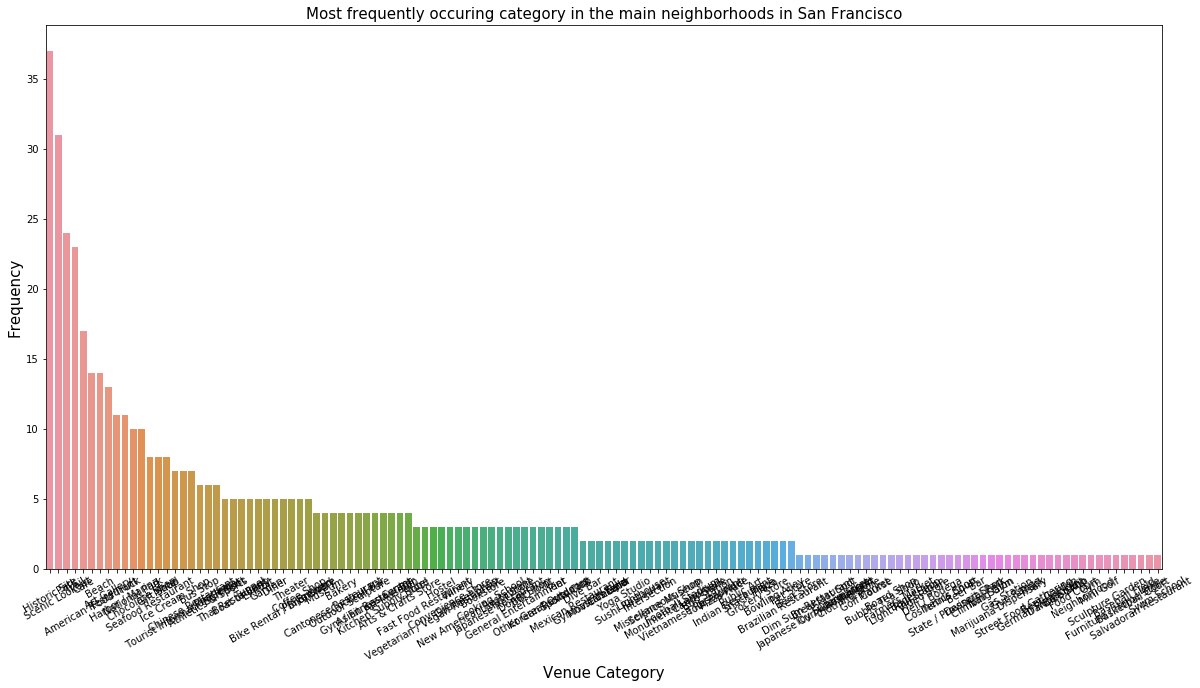

In [71]:
fig = plt.figure(figsize=(20,10))
s=sns.barplot(x="Venue Category", y="Frequency", data=sf_venues_freq)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('Most frequently occuring category in the main neighborhoods in San Francisco', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.show()

In [72]:
sf_venues_freq_10_freq = sf_venues_freq[0:10]
sf_venues_freq_10_freq.head(10)

,Venue Category,Frequency
0,Historic Site,37
1,Scenic Lookout,31
2,Park,24
3,Trail,23
4,Café,17
5,American Restaurant,14
6,Beach,14
7,Art Gallery,13
8,Food Truck,11
9,Harbor / Marina,11


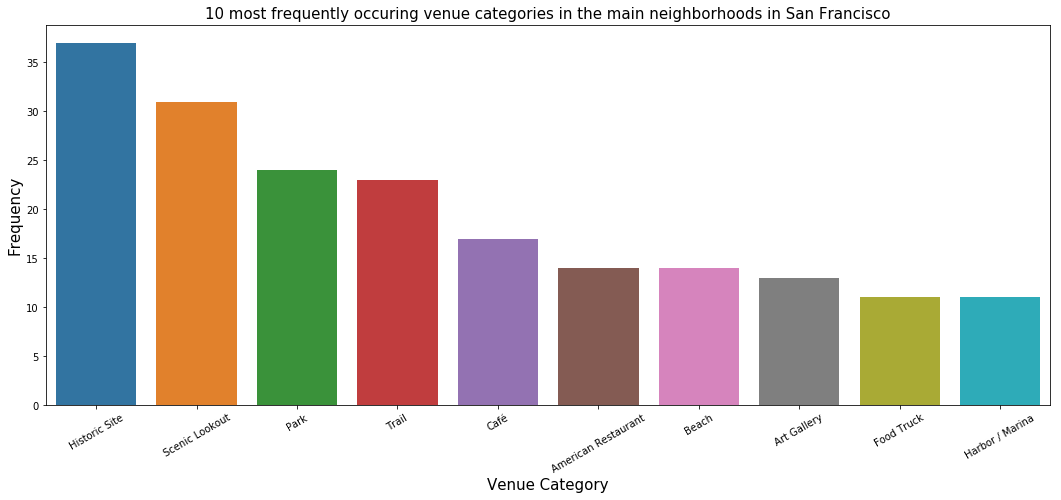

In [74]:
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=sf_venues_freq_10_freq)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('10 most frequently occuring venue categories in the main neighborhoods in San Francisco', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.show()

In [81]:
sf_parks_grouped = sf_parks.groupby('Parks').mean().reset_index()
sf_parks_grouped.head()

,Parks,Latitude,Longitude
0,Alcatraz,37.826721,-122.422759
1,Aquatic Park,37.806234,-122.425185
2,Baker Beach,37.793109,-122.483842
3,China Beach,37.788123,-122.490762
4,Cliff House,37.778555,-122.514080


# Clustering the Parks

In [82]:
from sklearn.cluster import KMeans
kclusters = 4
sf_clustered = sf_parks_grouped.drop('Parks', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_clustered)
kmeans.labels_[0:10]

array([0, 0, 2, 2, 1, 2, 1, 0, 1, 2], dtype=int32)